In [1]:
import xarray as xr
from dask.distributed import Client, progress
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from dask_jobqueue import PBSCluster
# Setup your PBSCluster
cluster = PBSCluster(
     cores=4, # The number of cores you want
     memory='128 GB', # Amount of memory
     processes=4, # How many processes
     queue='development', # The type of queue to utilize (/glade/u/apps/dav/opt/usr/bin/execcasper)
     local_directory='$TMPDIR', # Use your local directory
     resource_spec='select=1:ncpus=40:mem=128GB', # Specify resources
     walltime='06:00:00', # Amount of wall time
     interface='ib0', # Interface to use
 )
# Scale up
cluster.scale(1)
# Setup your client
client = Client(cluster)

In [3]:
ds = xr.open_mfdataset('/home/scrd106/model_output/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p2f1/Omon/thetao/gn/v20190429/thetao_Omon_CanESM5_piControl_r1i1p2f1_gn_*.nc',
chunks={'time':120}, parallel=True)

In [4]:
gm = ds.isel(time=slice(0,12000)).mean(dim=['i', 'j'])#.load()
gm2 = gm.thetao.groupby('time.year').mean('time')
#(gm2 -gm2.mean(dim='year')).plot(vmin=-0.2,vmax=0.2, cmap='RdBu_r')

In [5]:
gmtm = gm2.mean(dim='year').load()

In [6]:
gma = (gm2 -gmtm).load()

(5500.0, 0.0)

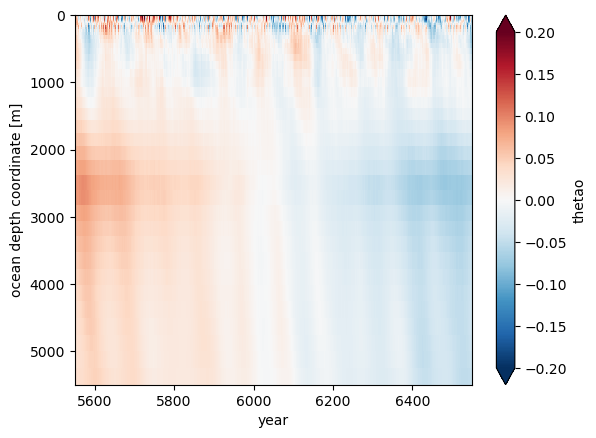

: 

In [12]:
gma.T.plot(vmin=-0.2,vmax=0.2, cmap='RdBu_r')
plt.gca().set_ylim([5500,0])